In [1]:
import tensorflow

In [77]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout

In [8]:
import keras.datasets.mnist

In [9]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

5

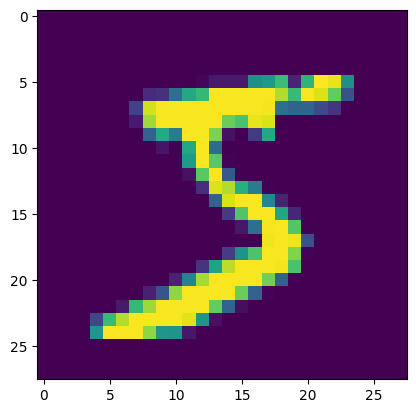

In [38]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
y_train[0]

In [39]:
X_train=X_train/255
X_test=X_test/255

In [86]:
model=Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [87]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 flatten_6 (Flatten)         (None, 10816)             0         
                                                                 
 dense_17 (Dense)            (None, 128)               1384576   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1386026 (5.29 MB)
Trainable params: 1386026 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [89]:
history=model.fit(X_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 65s 41ms/step - loss: 0.2227 - accuracy: 0.9329 - val_loss: 0.0805 - val_accuracy: 0.9762
Epoch 2/5
1500/1500 [==============================] - 61s 41ms/step - loss: 0.0791 - accuracy: 0.9758 - val_loss: 0.0631 - val_accuracy: 0.9814
Epoch 3/5
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0508 - accuracy: 0.9841 - val_loss: 0.0622 - val_accuracy: 0.9823
Epoch 4/5
1500/1500 [==============================] - 60s 40ms/step - loss: 0.0373 - accuracy: 0.9869 - val_loss: 0.0595 - val_accuracy: 0.9837
Epoch 5/5
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0291 - accuracy: 0.9904 - val_loss: 0.0619 - val_accuracy: 0.9840


In [90]:
y_prob=model.predict(X_test)

313/313 [==============================] - 3s 10ms/step


In [91]:
y_pred=y_prob.argmax(axis=1)

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9822

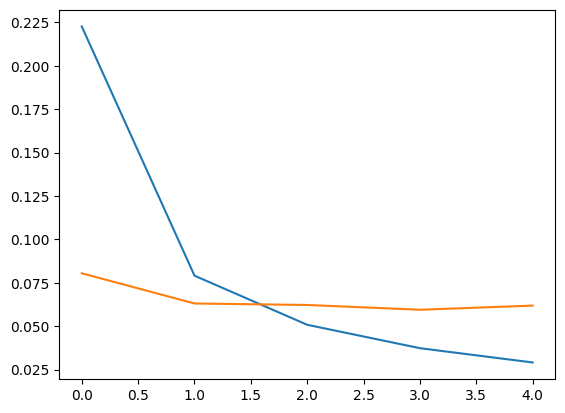

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

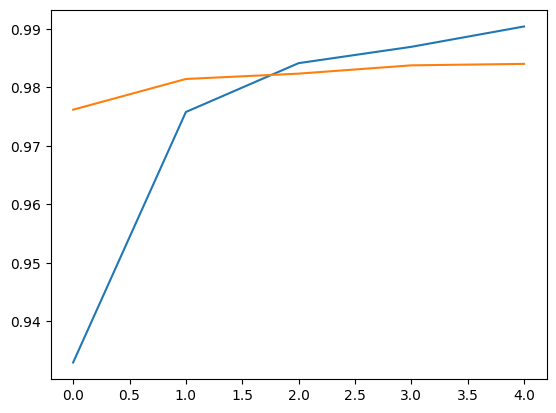

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

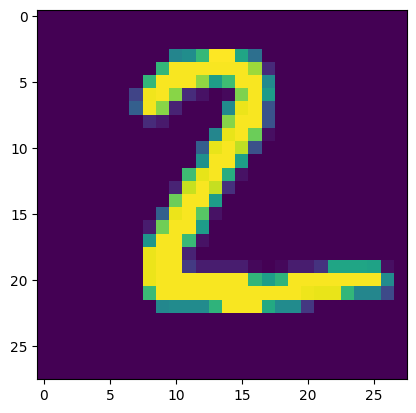

In [98]:
plt.imshow(X_test[1])

In [103]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 130ms/step


array([2], dtype=int64)